In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [93]:
def straight_line(x, m, c): return m*x+c

def plotting_function(xs, ys, curve_props, xlabel='', ylabel='', plot_shape='k.', round_to=4, tex_pos=(0.2, 0.7)):
    popt, pcov = curve_props
#     chisqr = np.sum((ys-straight_line(xs, popt[0], popt[1]))**2/sigma_y**2)
#     dof = len(ys) - 2
#     chisqr_red = chisqr/dof
    # print(r'Reduced $\chi^2 =$', chisqr_red)

    text = f"If the Equation is y = mx + c\nFor the best fit curve: \n"
    text += f"    m = {format(popt[0], '.4g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")

    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.figure(figsize=(8,6))
    # plt.errorbar(xs, ys, yerr=sigma_y, capsize=3, fmt='k.', label=r'$\sigma_y$')
    plt.plot(xs, ys, plot_shape, label='Data Points') 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k', label='Least-square Fit')
    # plt.plot(xFit, straight_line(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--")
    # plt.plot(xFit, straight_line(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend(loc='lower right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.minorticks_on()
    # plt.grid(which='major', alpha=0.5)
    # plt.grid(which='minor', alpha=0.3)

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)

In [11]:
l1 = np.array([546, 579, 596, 615, 620, 691, 494, 489, 435, 407])
l2 = np.array([546, 579, 596, 618, 624, 697, 493, 489, 435, 407])

If the Equation is y = mx + c
For the best fit curve: 
    m = 0.9806 ± 0.005669
    c = 9.42 ± 3.148

The curve looks like:


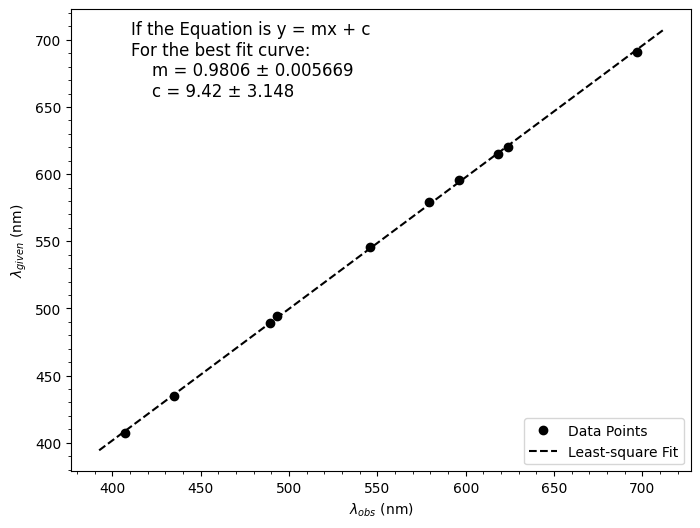

In [94]:
curve = curve_fit(f=straight_line, xdata=l2, ydata=l1)
plotting_function(l2, l1, curve,  r'$\lambda_{obs}$ (nm)','$\lambda_{given}$ (nm)', plot_shape='ko')

In [16]:
corr = curve[0][0]
print(f'Correction factor: {corr}')

Correction factor: 1.0194749252998825


In [37]:
ls = np.array([413, 436, 501, 588, 614, 627])
sins = np.sin(np.radians(np.array([12.542, 12.6125, 12.363, 12.258, 12.158, 12.125])))[::-1]

If the Equation is y = mx + c
For the best fit curve: 
    m = 2574 ± 432
    c = -497 ± 92

The curve looks like:


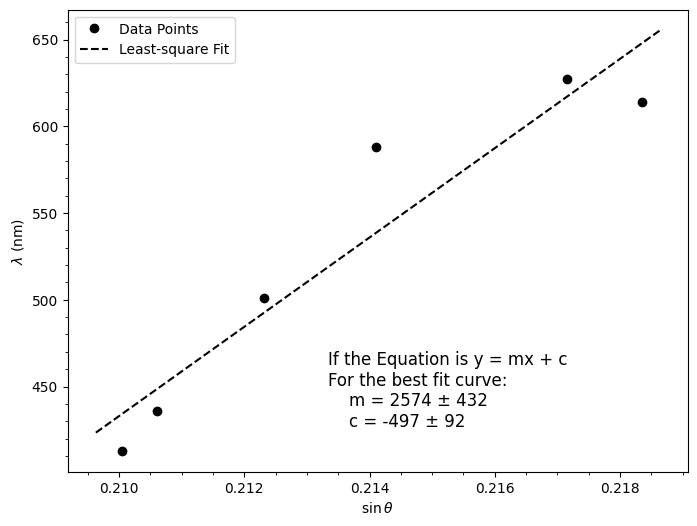

In [53]:
curve = curve_fit(f=straight_line, xdata=sins, ydata=ls)
plotting_function(sins, ls, curve, r'$\sin {\theta}$', r'$\lambda$ (nm)', plot_shape='ko')

In [77]:
bylam = 1e9/np.array([537.544, 541.571, 553.094])
nms = np.array([(1/4)-(1/9), (1/4)-(1/16), (1/4)-(1/25)])[::-1]

If the Equation is y = mx + c
For the best fit curve: 
    m = 7.444e+06 ± 4.22e+04
    c = 1.705e+06 ± 7649

The curve looks like:


0.744442077726991

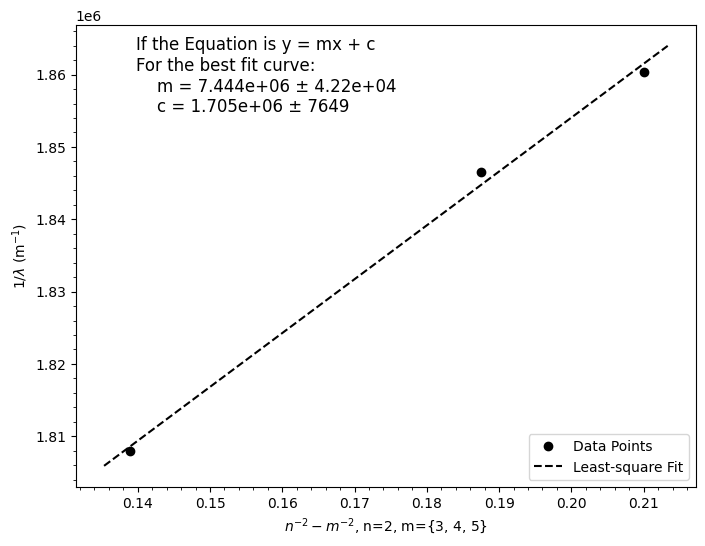

In [89]:
curve = curve_fit(f=straight_line, xdata=nms, ydata=bylam)
plotting_function(nms, bylam, curve, r'$n^{-2} - m^{-2}$, n=2, m={3, 4, 5}', r'$1/\lambda$ (m$^{-1}$)',  plot_shape='ko')
curve[0][0]/1e6

In [17]:
# brass
l3 = np.array([640, 579, 571, 521, 514, 509, 479, 471, 466, 457, 452, 450])

In [19]:
# copper
l4 = np.array([579,570, 521, 514, 509, 469, 464, 456, 451, 450, 447, 427])

In [18]:
# iodine
l4 = np.array([639, 635, 630, 626, 618, 615, 610, 607, 602, 596, 592, 589, 585, 580, 577, 575, 571, 568, 622, 626, 630, 635, 639])